## Modelo LDA

Recursos

1. [Paper original](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
2. [Documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
3. [Blog para el código](https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730)
4. [Guía para entender LDA](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np

In [2]:
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre

In [3]:
num_topics=15
data2=pd.read_excel('peruu.xlsx')
data2.head()

,Resolución,Fecha,Resumen,Subtema,año
0,001-2000,18/02/2000,001-2000 Fijan el Valor Nuevo de Reemplazo (...,Tarifarias,2000
1,002-2000,2000-02-28 00:00:00,002-2000 Establecen que los Factores de Pond...,Tarifarias,2000
2,003-2000,2000-04-13 00:00:00,003-2000 Aprueban los Factores de Ponderació...,Tarifarias,2000
3,004-2000,2000-04-13 00:00:00,004-2000 Fijan Tarifas en Barra y fórmulas d...,Tarifarias,2000
4,005-2000,NaN,005-2000 Aprueban la Memoria Anual 1999 de l...,Tarifarias,NaN


In [4]:
data2=data2[data2["año"]==2002]

In [5]:
data2

,Resolución,Fecha,Resumen,Subtema,año
105,. 0001-2002-OS/C,2002-01-14 00:00:00,. 0001-2002- Aprueban la publicación del docu...,Tarifarias,2002
106,. 0002-2002-OS/C,2002-01-17 00:00:00,. 0002-2002- Disponen la publicación en el Di...,Tarifarias,2002
107,. 0003-2002-OS/C,2002-01-14 00:00:00,. 0003-2002- Aprueban la rma “Procedimientos ...,Tarifarias,2002
108,. 0177-2002-OS/C,2002-01-14 00:00:00,. 0177-2002- Fijan clasificación y factores d...,Tarifarias,2002
109,. 0178-2002-OS/C,2002-01-14 00:00:00,. 0178-2002- Aprueban Factor de Recargo del F...,Tarifarias,2002
...,...,...,...,...,...
179,. 1471-2002-OS/C,2002-11-19 00:00:00,. 1471-2002- Aprueban tarifas y compensacione...,Tarifarias,2002
180,. 1472-2002-OS/C,2002-11-19 00:00:00,. 1472-2002- Consignan valores resultantes y ...,Tarifarias,2002
181,. 1489-2002-OS/C,5/12/2002,. 1489-2002- Publicacion del Proyecto de rma:...,Tarifarias,2002
182,. 1492-2002-OS/C,2002-12-13 00:00:00,. 1492-2002- Declara fundado en parte Recurso...,Tarifarias,2002


## Preprocesamiento
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [6]:
data2.Resumen=data2.Resumen.str.lower() 
data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') # Borro Puntuaciones
data2.Resumen=data2.Resumen.str.replace('[0-9]', ' ') # Quito números
data2.Resumen=data2.Resumen.str.replace('reuters', '')
data2.Resumen=data2.Resumen.str.replace('regulación', '')
data2.Resumen=data2.Resumen.str.replace('resolución', '')
data2.Resumen=data2.Resumen.str.replace('factores', '')
data2.Resumen=data2.Resumen.str.replace('  +', ' ')
data2.Resumen=data2.Resumen.str.replace('said', '') # Convierto minúsculas

In [7]:
data2.Resumen.iloc[3]

' fijan clasificación y de ponderación del vad del sistema de distribución eléctrico villacurí de la empresa coelvisa e / / p / / '

In [8]:
from stop_words import get_stop_words
stop_wordss = get_stop_words('spanish')
stop_wordss.append("abreviaturas")
stop_wordss.append("factores")

In [9]:
stop_wordss

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [10]:
stop_wordss.append("regulación")

In [11]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_wordss, ngram_range=(1,3)) # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(data2.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [12]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

(79, 415)


In [13]:
TF_detallada.head() # Exploramos la matriz término-documento

,actualización,actualización sistemas,actualización sistemas secundarios,aguaytía,anexos,antamina,anual,aplicable,aplicable usuarios,aplicable usuarios servicio,...,uso terceros,usuarios,usuarios servicio,usuarios servicio público,vadbt,vadmt,vadmt vadbt,valores,verde,viembre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
frecuencias.head(15)

,Freq
reconsideración,30
recurso,26
recurso reconsideración,26
declaran,24
reconsideración interpuesto,22
recurso reconsideración interpuesto,22
interpuesto,22
aprueban,20
transmisión,20
tarifas,19


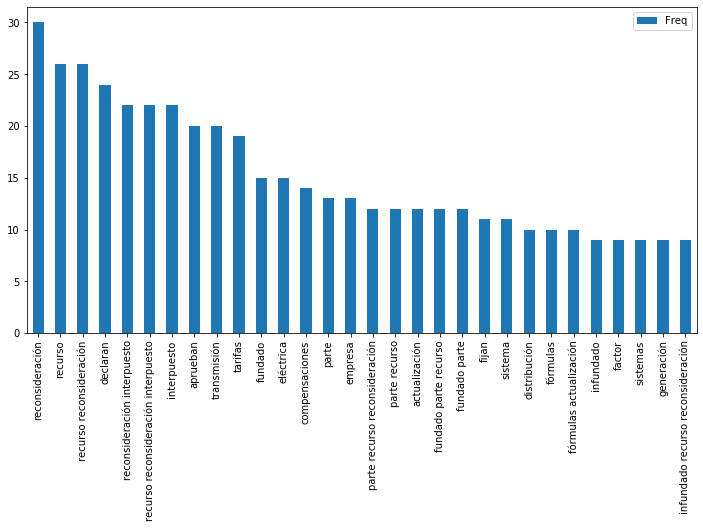

In [15]:
frecuencias.head(30).plot(kind='bar', figsize=(12,6))

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud #importo la función

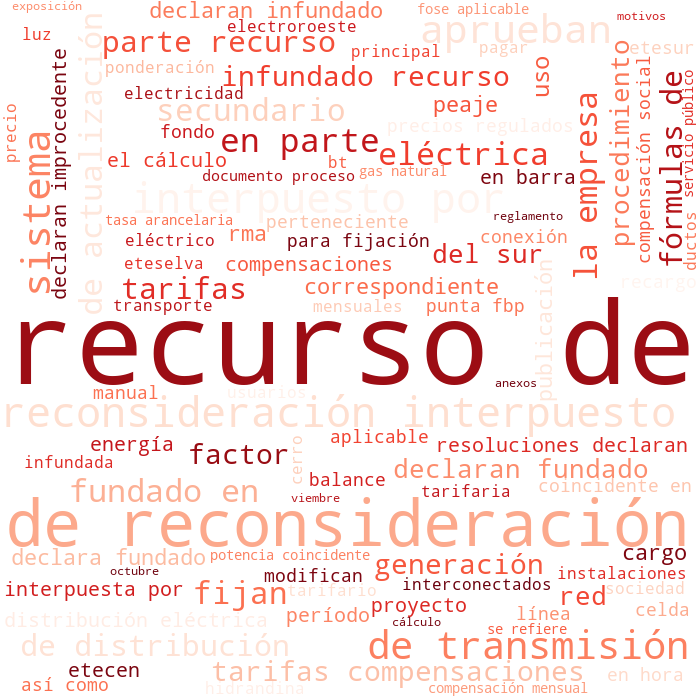

In [18]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(data2.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO

In [19]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [20]:
print(lda.components_.shape) # De que tma~no es el resultado?
lda.components_ # Exploremos el resultado

(15, 415)


array([[1.10000606, 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [1.09999784, 0.1       , 0.1       , ..., 1.10001442, 0.10001719,
        0.1       ],
       [4.09998124, 0.1       , 0.1       , ..., 0.1       , 0.10256284,
        0.1       ],
       ...,
       [2.1000176 , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 2.09741997,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        1.10000147]])

In [21]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden 

In [22]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
transmisión, sistema, secundario, sistema secundario transmisión, sistema secundario, secundario transmisión, tarifas, aprueban tarifas, aprueban, empresa, energía, así, sur, actualización, así fórmulas

Topic #1:
fijan, uso, compensación, fijan compensación, fijan compensación mensual, mensual, compensación mensual, compensación mensual percibirá, uso terceros, terceros, mensual percibirá, percibirá, celdas, compensaciones, etecen

Topic #2:
recurso reconsideración, recurso, reconsideración, fundado, declara, reconsideración interpuesto, recurso reconsideración interpuesto, interpuesto, declara fundado, fundado parte recurso, fundado parte, parte recurso, parte recurso reconsideración, declara fundado parte, parte

Topic #3:
proyecto, aprueban, manual, manual contabilidad, manual contabilidad regulatoria, regulatoria, contabilidad, contabilidad regulatoria, publican proyecto, publican, reglamento, motivos, exposición motivos, exposición, publicación

Topic #4:
diversas, ede

In [23]:
# Como se ven los documentos?
lda_output=lda.transform(tf) # transformo la matrix de término-documento en tópico-documento
print(lda_output.shape) # Qué indican las dimensiones?
docs=['doc'+str(i) for i in range(lda_output.shape[0])] # Nombres de filas
topics=['topics'+str(i) for i in range(lda_output.shape[1])] # Nombres de columnas
lda_output=pd.DataFrame(lda_output, index=docs, columns=topics)

(79, 15)


In [24]:
# Exploremos la salida desde el punto de vista de documentos
lda_output.head().sum(axis=1) # Porque las filas suman 1?


doc0    1.0
doc1    1.0
doc2    1.0
doc3    1.0
doc4    1.0
dtype: float64

In [25]:
# Cómo se distribuye el documento promedio?
lda_output.head().mean(axis=0)

topics0     0.006276
topics1     0.006276
topics2     0.006276
topics3     0.021089
topics4     0.006276
topics5     0.177703
topics6     0.006276
topics7     0.006276
topics8     0.023231
topics9     0.006276
topics10    0.188094
topics11    0.006276
topics12    0.006276
topics13    0.193415
topics14    0.339984
dtype: float64

In [26]:
# Creemos la pertenencia al tópicos
topico_dominante = np.argmax(lda_output.values, axis=1) 
lda_output['Topico_dominante']=topico_dominante
lda_output.head(10)

,topics0,topics1,topics2,topics3,topics4,topics5,topics6,topics7,topics8,topics9,topics10,topics11,topics12,topics13,topics14,Topico_dominante
doc0,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004880,0.004878,0.004878,0.004878,0.004878,0.004878,0.931703,14
doc1,0.007407,0.007407,0.007407,0.081476,0.007407,0.007408,0.007407,0.007407,0.092183,0.007407,0.007407,0.007408,0.007408,0.451868,0.292990,13
doc2,0.003509,0.003509,0.003509,0.003509,0.003509,0.003510,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.494742,0.459642,13
doc3,0.009525,0.009526,0.009524,0.009524,0.009524,0.866656,0.009524,0.009525,0.009524,0.009524,0.009526,0.009524,0.009525,0.009524,0.009524,5
doc4,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.915150,0.006061,0.006061,0.006061,0.006061,10
doc5,0.006061,0.915151,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,1
doc6,0.298852,0.514923,0.004255,0.004255,0.004255,0.004256,0.004255,0.004257,0.135158,0.004255,0.004255,0.004255,0.004256,0.004255,0.004256,1
doc7,0.004082,0.004082,0.004082,0.004082,0.004082,0.004082,0.004082,0.942856,0.004082,0.004082,0.004082,0.004082,0.004082,0.004082,0.004082,7
doc8,0.005128,0.005128,0.005129,0.005128,0.005128,0.005128,0.005129,0.005128,0.005128,0.005128,0.928202,0.005128,0.005128,0.005128,0.005128,10
doc9,0.005406,0.005405,0.005405,0.005405,0.005405,0.062017,0.867710,0.005406,0.005406,0.005405,0.005405,0.005405,0.005406,0.005405,0.005405,6


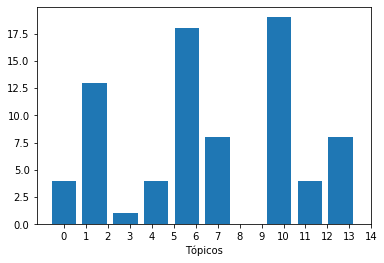

In [27]:
plt.hist(lda_output.Topico_dominante, density=False, rwidth=0.8, align='left')
plt.xlabel('Tópicos')
plt.xticks(range(num_topics));

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [28]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 7.87 s


Text(0, 0.5, 'log-likelihood')

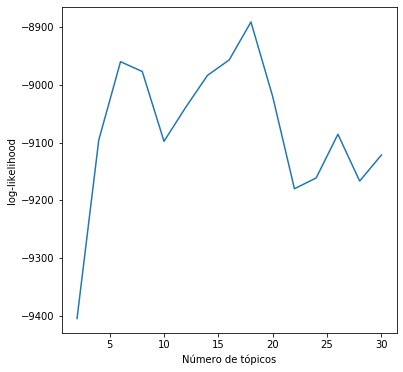

In [29]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA
LDAvis es un paquete para la visualización para interpretar más fácilmente el LDA. Vea el paper [aquí](https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf), en este agregan un nuevo parámetro para la interpretació, $\lambda \in [0,1]$, el cual pondera la importancia de una palabra dentro del tópico por la unicidad de la palabra a lo largo de los tópicos. 
* $\lambda\rightarrow1$: este es el caso original, permite que la palabra sea repetida a lo largo de los tópicos.
* $\lambda\rightarrow0$: este caso cambia el rqanking de importancia, dándole mayor importancia a las palabras que sean únicas del tópico, es decir que no aparezcan casi en los demás.


In [30]:
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda

In [31]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, "peru.html") # Guardo la visualización como html

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook